## 운동(practice) 데이터프레임 만들기

In [2]:
import pandas as pd

practice = pd.DataFrame({
    '날짜':[],
    '운동':[],
    '운동량':[]
})
practice

,날짜,운동,운동량


In [3]:
practice.loc[0] = ['23-3-1', '달리기', 1]
practice

,날짜,운동,운동량
0,23-3-1,달리기,1.0


In [4]:
practice.loc[1] = ['23-3-2', '걷기', 1]
practice.loc[2] = ['23-3-2', '달리기', 1]
practice.loc[3] = ['23-3-2', '계단오르기', 1]
practice

,날짜,운동,운동량
0,23-3-1,달리기,1.0
1,23-3-2,걷기,1.0
2,23-3-2,달리기,1.0
3,23-3-2,계단오르기,1.0


In [5]:
practice.loc[4] = ['23-3-3', '걷기', 1.5]
practice.loc[5] = ['23-3-3', '달리기', 1]
practice.loc[6] = ['23-3-4', '걷기', 1.5]
practice.loc[7] = ['23-3-5', '달리기', 1]
practice.loc[8] = ['23-3-6', '걷기', 2.5]
practice.loc[9] = ['23-3-6', '달리기', 0.5]
practice

,날짜,운동,운동량
0,23-3-1,달리기,1.0
1,23-3-2,걷기,1.0
2,23-3-2,달리기,1.0
3,23-3-2,계단오르기,1.0
4,23-3-3,걷기,1.5
5,23-3-3,달리기,1.0
6,23-3-4,걷기,1.5
7,23-3-5,달리기,1.0
8,23-3-6,걷기,2.5
9,23-3-6,달리기,0.5


In [15]:
practice = practice.set_index('날짜')
practice

,운동,운동량
날짜,,
23-3-1,달리기,1.0
23-3-2,걷기,1.0
23-3-2,달리기,1.0
23-3-2,계단오르기,1.0
23-3-3,걷기,1.5
23-3-3,달리기,1.0
23-3-4,걷기,1.5
23-3-5,달리기,1.0
23-3-6,걷기,2.5


### CSV 파일 만들기 - 운동.to_csv()

In [16]:
practice.to_csv("./data/do_exercise2.csv")

### csv 파일 읽기 - pandas.read_csv()

In [17]:
import pandas as pd

practice = pd.read_csv("./data/do_exercise2.csv", encoding='UTF-8', index_col=0)
practice

,운동,운동량
날짜,,
23-3-1,달리기,1.0
23-3-2,걷기,1.0
23-3-2,달리기,1.0
23-3-2,계단오르기,1.0
23-3-3,걷기,1.5
23-3-3,달리기,1.0
23-3-4,걷기,1.5
23-3-5,달리기,1.0
23-3-6,걷기,2.5


In [19]:
practice.pivot_table(index="운동", values='운동량')  # 기본은 평균

,운동량
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [22]:
practice.pivot_table(index='운동', values='운동량', aggfunc='sum') #합계

,운동량
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


## numpy 피벗테이블 사용하기

In [4]:
import numpy as np

practice.pivot_table(index="운동", aggfunc=np.sum) # 합계

,운동량
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [5]:
practice.pivot('날짜', '운동', '운동량')

운동,걷기,계단오르기,달리기
날짜,,,
23-3-1,NaN,NaN,1.0
23-3-2,1.0,1.0,1.0
23-3-3,1.5,NaN,1.0
23-3-4,1.5,NaN,NaN
23-3-5,NaN,NaN,1.0
23-3-6,2.5,NaN,0.5


## 서울시민이 운동을 하지 않는 이유 분석
### pd.read_excel() 함수로 엑셀파일 읽기
#### 에러 발생한 경우 - import warnings warnings.simplefilter("ignore")

In [21]:
import warnings 
warnings.simplefilter("ignore")

not_exercise = pd.read_excel("./data/reason_not_exercise.xlsx", header=1)
not_exercise

,시점,구분별(1),구분별(2),운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019.0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,NaN,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,NaN,NaN,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,NaN,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,NaN,NaN,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,NaN,NaN,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,NaN,NaN,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,NaN,NaN,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,NaN,NaN,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,NaN,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [22]:
# 칼럼(열) 리스트 작업
# print(not_exercise.columns[0])
not_exercise.rename(columns={'구분별(1)':'대분류', '구분별(2)':'분류'}, inplace=True)  # 칼럼 이름 변경
print(not_exercise.columns[1:3])
not_exercise.drop(columns='시점', inplace=True)
not_exercise

Index(['대분류', '분류'], dtype='object')


,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,NaN,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,NaN,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,NaN,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,NaN,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,NaN,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,NaN,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [23]:
not_exercise.drop(index=range(22, 52), inplace=True)  # 22행 ~ 51행까지 삭제
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,NaN,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,NaN,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,NaN,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,NaN,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,NaN,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,NaN,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


## 성별 분류
### 깊은 복사와 얕은 복사

In [27]:
not_exercise.loc[2, "대분류"] = "성별" # 2행의 NaN을 찾아 성별로 변경함
not_exercise.loc[2]
not_exercise
not_ex_sex = not_exercise[not_exercise['대분류'] == '성별'].copy()  # 깊은 복사
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7


### 얕은 복사, 깊은 복사

In [117]:
# 얕은 복사
a = [1, 2, 3, 4]
a

[1, 2, 3, 4]

In [118]:
b = a
b

[1, 2, 3, 4]

In [119]:
b[1] = 10
b

[1, 10, 3, 4]

In [120]:
a   # b리스트를 변경하면 a(원본)도 똑같이 변경됨

[1, 10, 3, 4]

In [121]:
# 깊은 복사
a = [1, 2, 3, 4]
a

[1, 2, 3, 4]

In [122]:
b = a.copy()
b

[1, 2, 3, 4]

In [123]:
b[1] = 10
b

[1, 10, 3, 4]

In [124]:
a   # b리스트를 변경해도 a는 원본을 유지함

[1, 2, 3, 4]

In [28]:
not_ex_sex.drop(columns="대분류", inplace=True)
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,여자,42.5,5.6,3.9,41.0,5.4,1.7


In [29]:
# 분류를 index로 하기
not_ex_sex.set_index("분류", inplace=True)
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,
남자,52.4,4.4,4.9,32.4,4.9,1.1
여자,42.5,5.6,3.9,41.0,5.4,1.7


### figure : 그래프를 그릴 공간(종이) / ax(axes) : 그 공간 중 지금 내가 사용할 부분
#### 1. fig = plt.figure() : ax 없는 빈 figure 생성 (후에 ax를 추가해줘야함)
#### 2. fig, ax = plt.subplots() : 하나의 ax 만을 가지는 하나의 figure 생성
#### 3. fig, axes = plt.subplots(1,2) : 2개(1*2)의 ax들을 가지는 하나의 figure 생성

Text(0, 0.5, '')

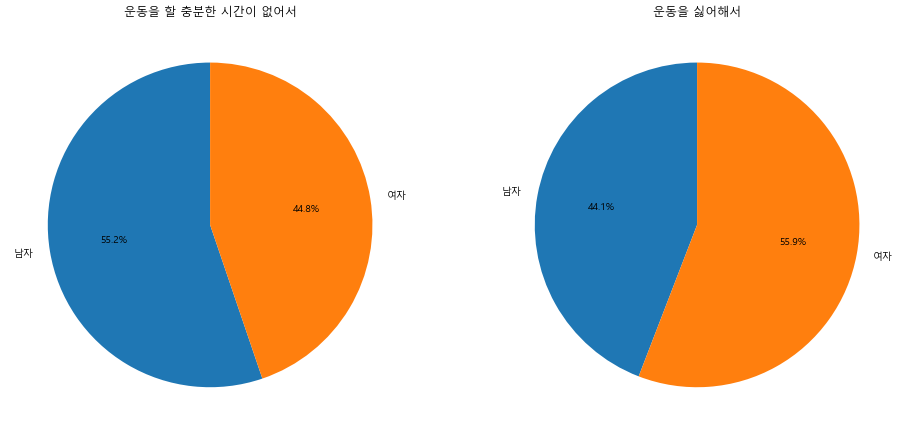

In [35]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(16, 8)) # 1행 2열


plt.rc("font", family="Malgun Gothic")
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(ax=ax[0], autopct="%.1f%%", startangle=90)
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_sex['운동을 싫어해서'].plot.pie(ax=ax[1], autopct='%.1f%%', startangle=90)
ax[1].set_title('운동을 싫어해서')
ax[1].set_ylabel('')

## 연령별 분석

In [37]:
"""
not_exercise.loc[4, '대분류'] = '연령별'
not_exercise.loc[5, '대분류'] = '연령별'
not_exercise.loc[6, '대분류'] = '연령별'
not_exercise.loc[7, '대분류'] = '연령별'
not_exercise.loc[8, '대분류'] = '연령별'
"""
for i in range(4, 9):
    not_exercise.loc[i, '대분류'] = '연령별'

not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [38]:
not_ex_age = not_exercise[not_exercise['대분류']=='연령별'].copy()
#not_ex_age
not_ex_age.drop(columns='대분류', inplace=True)
#not_ex_age
not_ex_age.set_index('분류', inplace=True)
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,
10대,55.3,4.8,3.9,32.6,3.5,-
20대,46.0,4.2,4.5,38.8,6.4,0.1
30대,59.9,5.2,2.9,27.3,4.5,0.2
40대,54.1,3.9,2.9,35.5,3.3,0.4
50대,46.1,6.2,4.5,36.8,5.6,0.8
60대 이상,26.6,6.0,6.6,48.7,6.6,5.6


## 파이 차트 만들기

Text(0, 0.5, '')

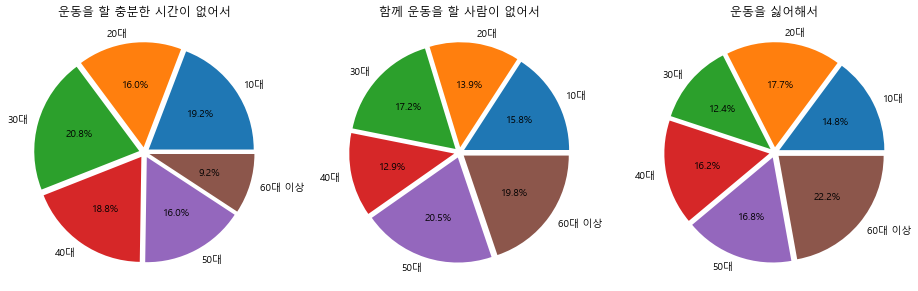

In [46]:
f, ax = plt.subplots(1,3, figsize=(16, 8))
explode_setting = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode=explode_setting, ax=ax[0], autopct='%.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode=explode_setting, ax=ax[1], autopct='%.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

not_ex_age['운동을 싫어해서'].plot.pie(explode=explode_setting, ax=ax[2], autopct='%.1f%%')
ax[2].set_title('운동을 싫어해서')
ax[2].set_ylabel('')